In [17]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)
%matplotlib inline

## matplotlib API入门

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = np.arange(10)

In [4]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

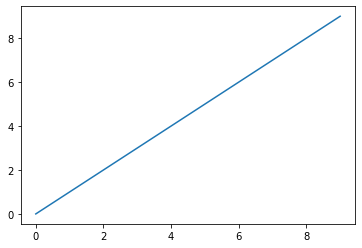

In [5]:
plt.plot(data)

### Figure和Subplot

In [19]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [12]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

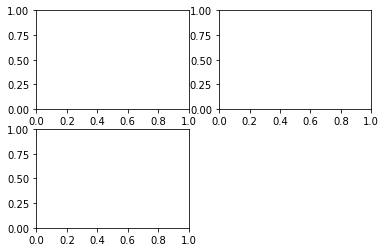

In [20]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

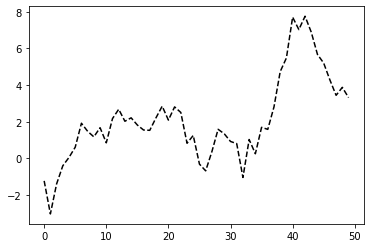

In [21]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [22]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30)+3 * np.random.randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002667C9E29E8>,
      dtype=object)

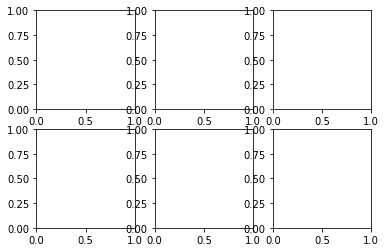

In [26]:
fig, axes = plt.subplots(2, 3)
axes

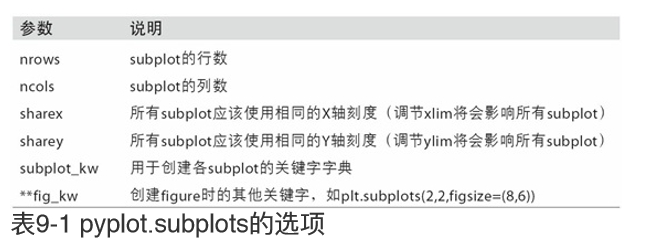

### 调整subplot周围的间距

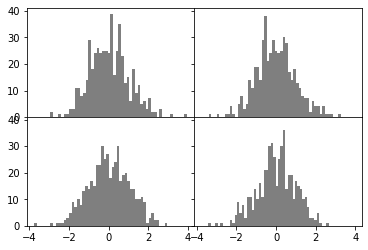

In [27]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色、标记和线型

ax.plot(x, y, 'g--')
ax.plot(x, y, linestyle='--', color='g')

标记也可以放到格式字符串中，但标记类型和线型必须 放在颜⾊后⾯： 

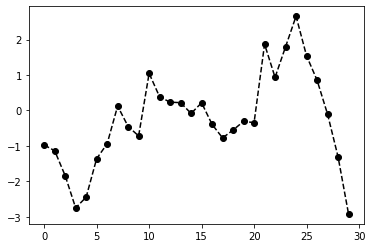

In [29]:
from numpy.random import randn

plt.plot(randn(30).cumsum(), 'ko--')

In [30]:
plt.close('all')

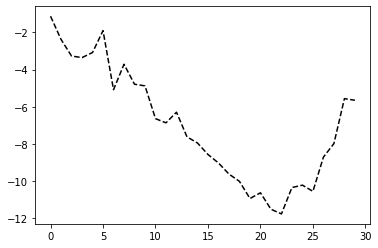

In [31]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

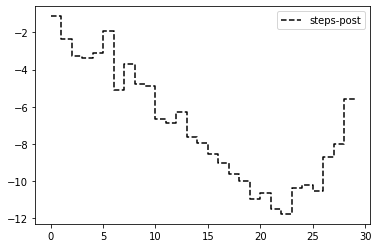

In [32]:
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

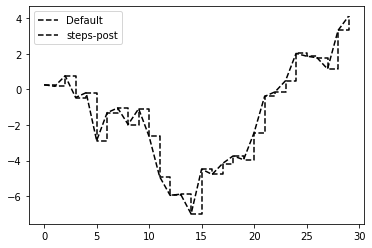

In [33]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### 刻度、标签和图例

t）以及更为⾯向对象的原⽣ matplotlib API。 pyplot接⼝的设计⽬的就是交互式使⽤，含有诸如xlim、xticks和 xticklabels之类的⽅法。它们分别控制图表的范围、刻度位置、 刻度标签等。其使⽤⽅式有以下两种： 调⽤时不带参数，则返回当前的参数值（例如，plt.xlim()返回 当前的X轴绘图范围）。 调⽤时带参数，则设置参数值（例如，plt.xlim([0,10])会将X轴 的范围设置为0到10）。 

### 设置标题、轴标签、刻度以及刻度标签

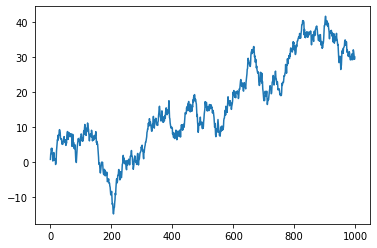

In [35]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [36]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

改变x轴刻度，最简单的办法是使⽤set_xticks和 set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的 哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以 通过set_xticklabels将任何其他的值⽤作标签： 

In [37]:
ax.set_title('My first plot')

Text(0.5, 1, 'My first plot')

In [38]:
ax.set_xlabel('Stages')

Text(0.5, 3.1999999999999993, 'Stages')

props = { 'title': 'My first matplotlib plot', 'xlabel': 'Stages' } ax.set(**props)

### 添加图例

In [39]:
from numpy.random import randn

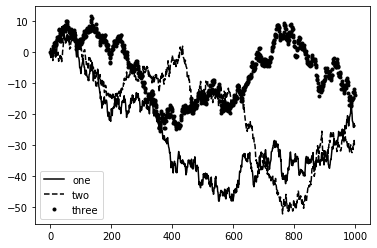

In [41]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

### 注解以及在Subplot上绘图

ax.text(x, y, 'Hello world!', family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2009-2009 financial crisis')

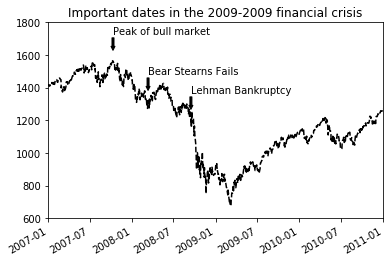

In [48]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
#data.head()
spx = data['SPX']

spx.plot(ax=ax, style='k--')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12),'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, 
               xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
    

#Zoom in om 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2009-2009 financial crisis')

【注】ax.annotate方法可以在指定的x和y坐标轴绘制标签。我们使用set_xlim和set_ylim人工设定起始和结束边界，而不是使用matplotlib的默认方法。最后，用ax.set_title添加图例标题

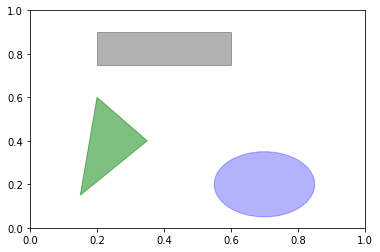

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                    color='g', alpha=0.5)
        
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图标保存到文件

- plt.savefig('figpath.svg')
- plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
- from io import BytesIO buffer = BytesIO() plt.savefig(buffer) plot_data = buffer.getvalue()


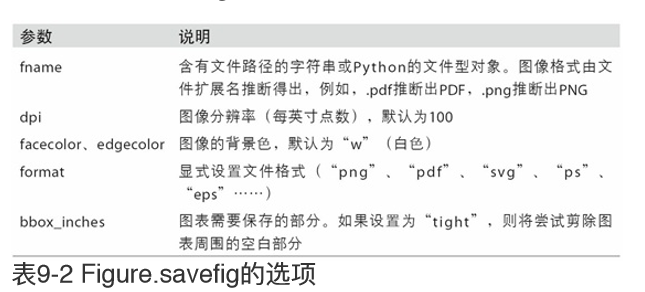

### matplotlib配置

matplotlib⾃带⼀些配⾊⽅案，以及为⽣成出版质量的图⽚⽽设 定的默认配置信息。幸运的是，⼏乎所有默认⾏为都能通过⼀组 全局参数进⾏⾃定义，它们可以管理图像⼤⼩、subplot边距、配 ⾊⽅案、字体⼤⼩、⽹格类型等。⼀种Python编程⽅式配置系统 的⽅法是使⽤rc⽅法。例如，要将全局的图像默认⼤⼩设置为 10×10，你可以执⾏： 

- plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size' : 'small'
    
}

plt.rc('font', **font_options)

## 使用pandas和Seaborn绘图

### 线型图

In [52]:
plt.close('all')

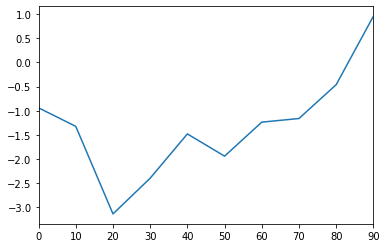

In [53]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

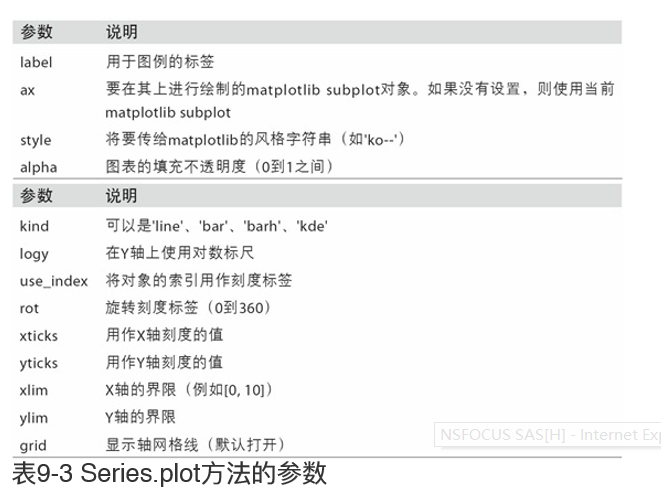

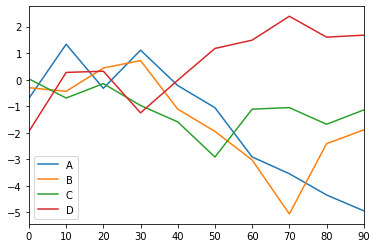

In [54]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))
df.plot()

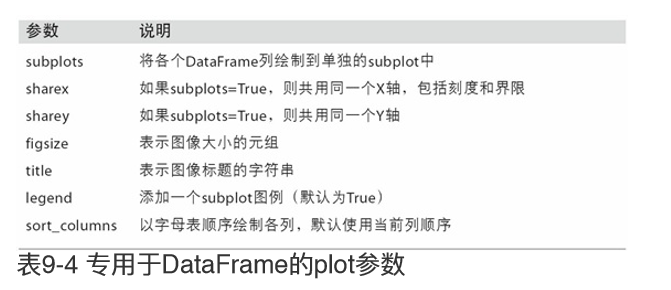

### 柱状图

plot.bar()和olot.barh()分别绘制水平和垂直的柱状图。这时Series和DataFrame的索引将会被用作X（bar）或Y（barh）刻度

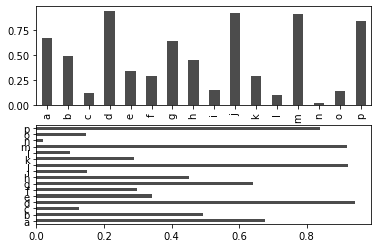

In [57]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

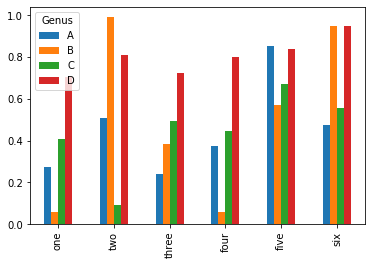

In [60]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

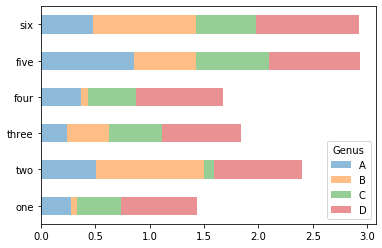

In [61]:
df.plot.barh(stacked=True, alpha=0.5)

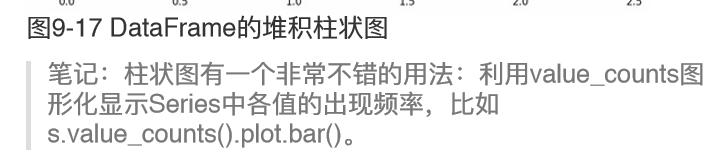

In [62]:
tips = pd.read_csv('examples/tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [63]:
party_counts = party_counts.loc[:, 2:5]

In [64]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [65]:
#然后进行归一化，使得各行的和为1，并生成图标
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


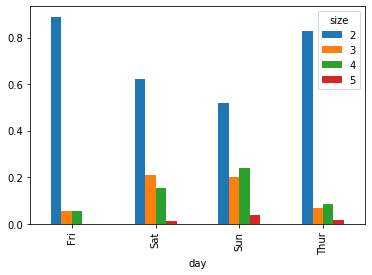

In [66]:
party_pcts.plot.bar()

In [68]:
plt.close('all')

In [69]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


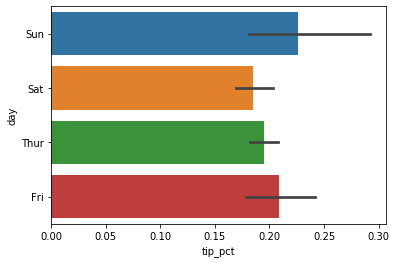

In [70]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

绘制在柱状图上的黑线代表95%置信区间

seaborn.barplot有颜色选项，是我们能够通过一个额外的值设置

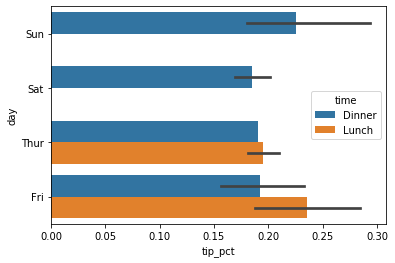

In [72]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [73]:
plt.close('all')

In [74]:
sns.set(style='whitegrid')

### 直方图和密度图

直⽅图（histogram）是⼀种可以对值频率进⾏离散化显示的柱 状图。数据点被拆分到离散的、间隔均匀的⾯元中，绘制的是各 ⾯元中数据点的数量。

。再以前⾯那个⼩费数据为例，通过在 Series使⽤plot.hist⽅法，我们可以⽣成⼀张“⼩费占消费总额百 分⽐”的直⽅图

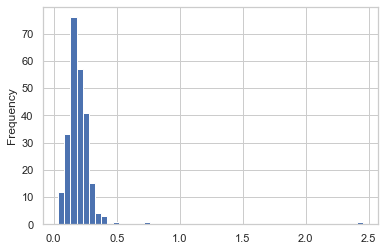

In [75]:
tips['tip_pct'].plot.hist(bins=50)

密度图：通过计算“可能会产⽣ 观测数据的连续概率分布的估计”⽽产⽣的。⼀般的过程是将该 分布近似为⼀组核（即诸如正态分布之类的较为简单的分布）。 因此，密度图也被称作KDE（Kernel Density Estimate，核密度 估计）图

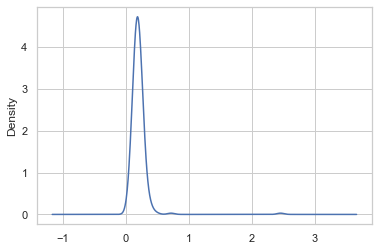

In [76]:
tips['tip_pct'].plot.density()

seaborn的distplot⽅法绘制直⽅图和密度图更加简单，还可以同 时画出直⽅图和连续密度估计图

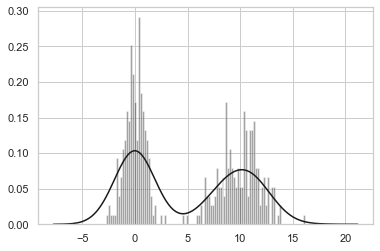

In [77]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 散步图或点图

In [79]:
macro = pd.read_csv('examples/macrodata.csv')

data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
#trans_data.head()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [84]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

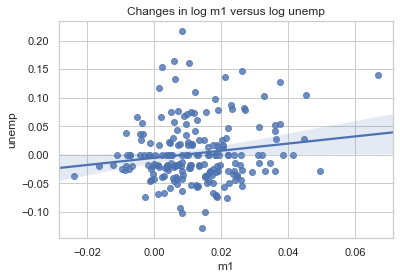

In [90]:
sns.regplot('m1', 'unemp', data=trans_data)   #可以做一个散布图，并加生一条线性回归的线
plt.title('Changes in log %s versus log %s' %('m1', 'unemp'))

同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵

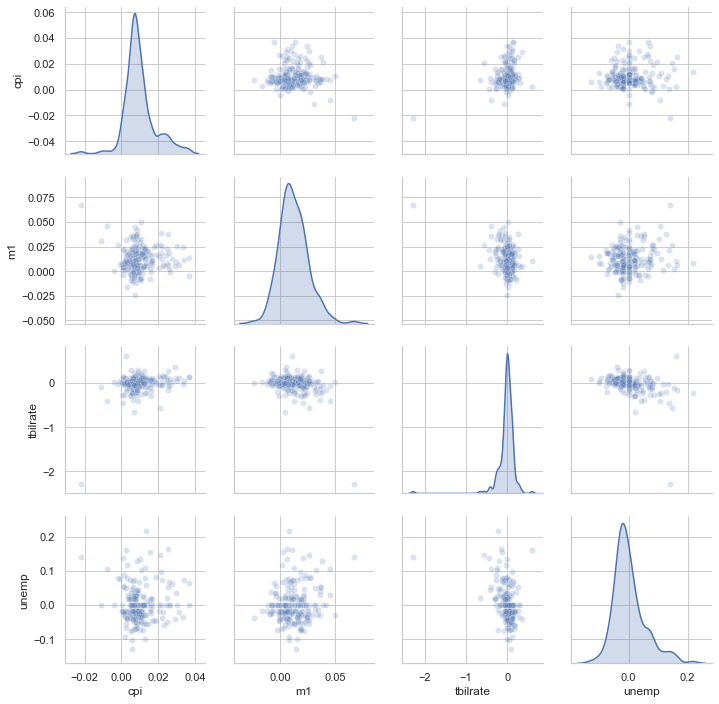

In [91]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

plot_kws 让我们传递配置选项到非对角线元素上的图形使用

### 分面网格（facet grid）和类型数据

factorplot可以简化制作多种分面图

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


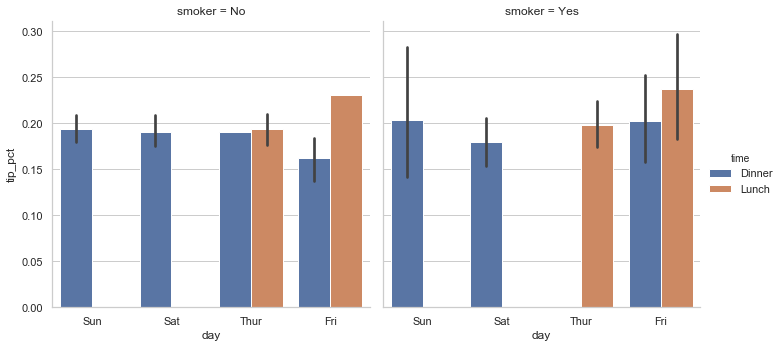

In [92]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

按照天/时间/吸烟者的⼩费百分⽐ 

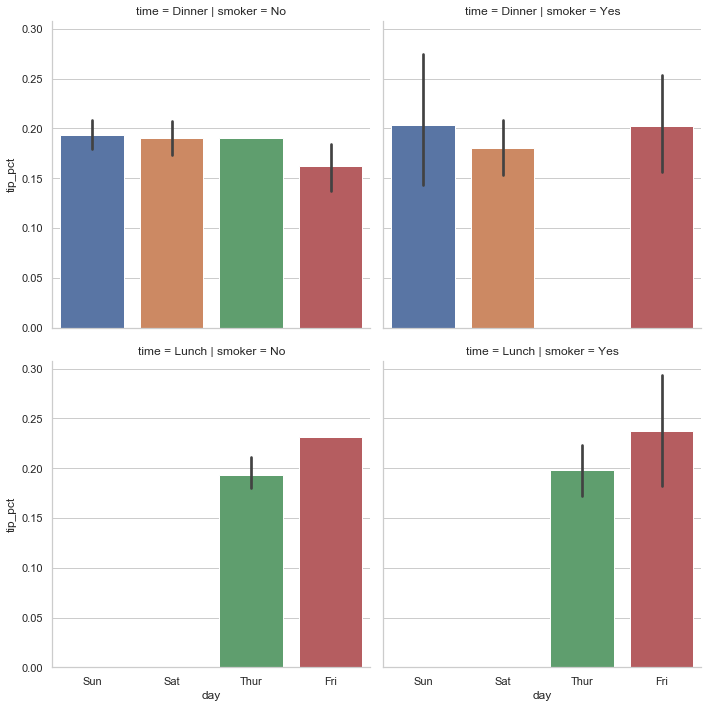

In [93]:
sns.factorplot(x='day', y='tip_pct', row='time',
               col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

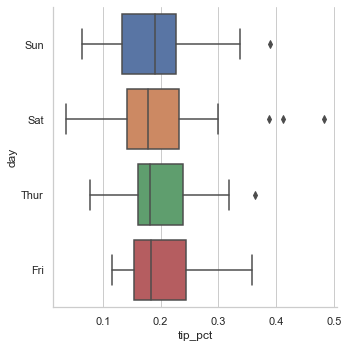

In [94]:
sns.factorplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])